<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

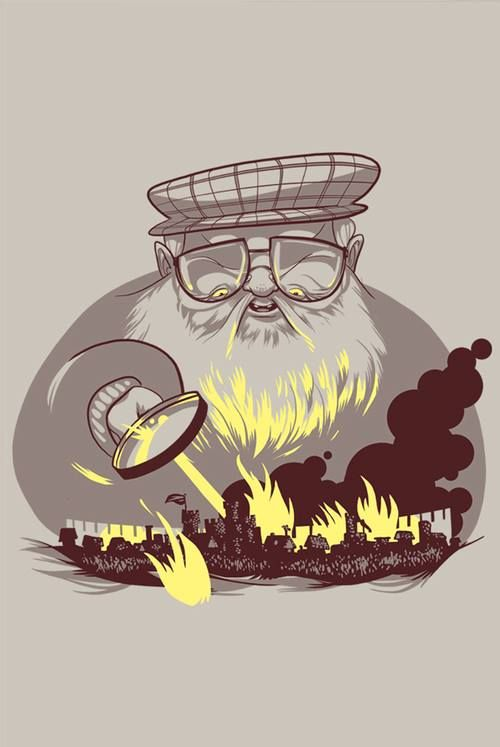

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [165]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /home/livonian_horde/DLS_Course/HW1/game_of_thrones_test.csv
100%|██████████████████████████████████████| 37.3k/37.3k [00:00<00:00, 1.29MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /home/livonian_horde/DLS_Course/HW1/game_of_thrones_train.csv
100%|████████████████████████████████████████| 138k/138k [00:00<00:00, 1.84MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import clear_output

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [167]:
data_train = pd.read_csv(r'/home/livonian_horde/DLS_Course/HW1/game_of_thrones_train.csv')
data_train.set_index('S.No', inplace=True)
data_train

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<BarContainer object of 25 artists>

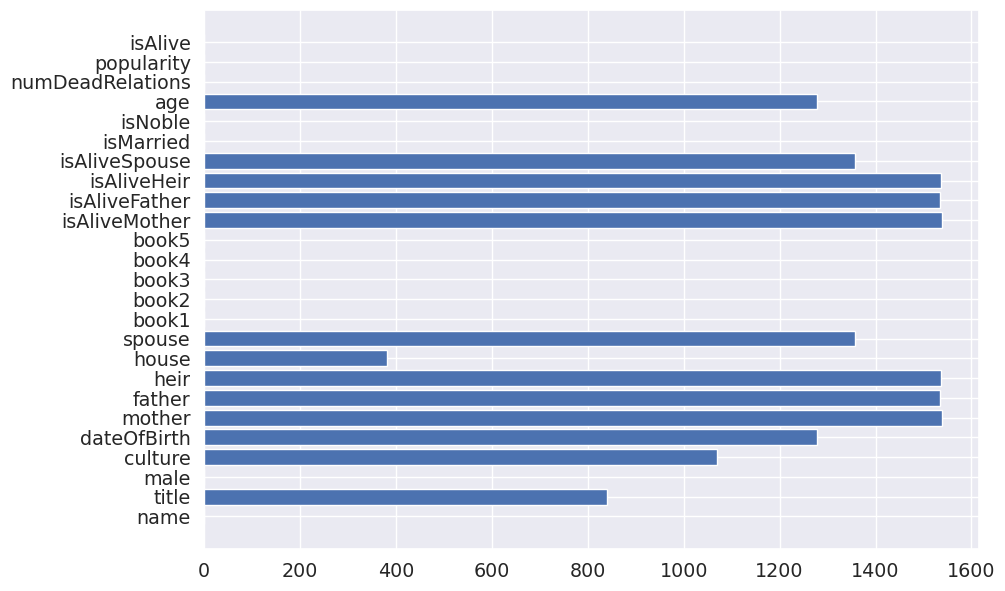

In [168]:
data = data_train.isna().sum()
plt.figure(figsize=(10,7))
plt.barh(data.index, data.values)

Категориальные признаки с большим объемом пустых значений (heir, father, mother,spouse) можно просто удалить, как и признак dateOfBirth (т.к. его среднее значение ни о чем не говорит)

<BarContainer object of 20 artists>

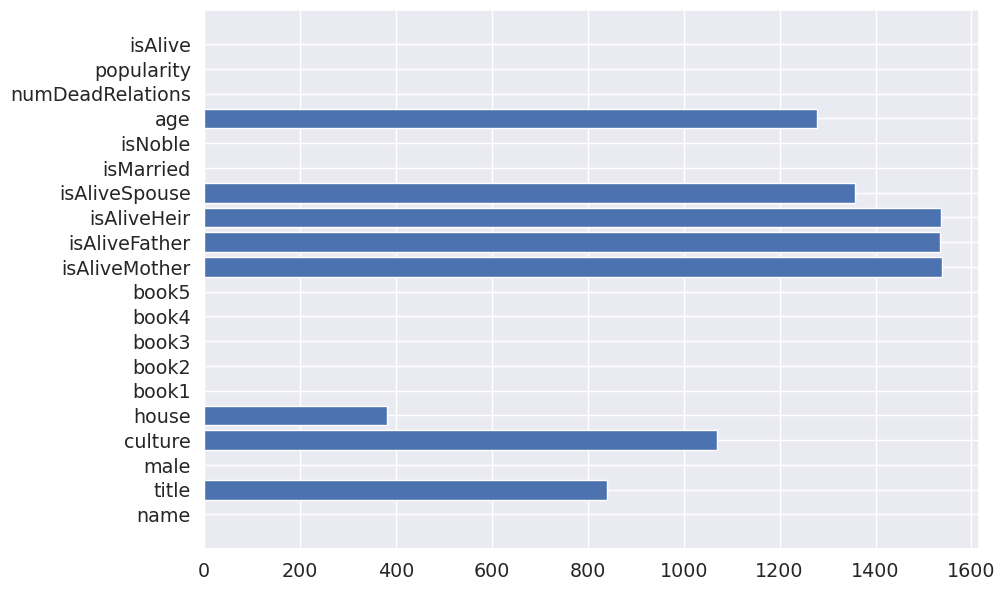

In [169]:
data_train.drop(["mother", "father", "heir", "spouse", "dateOfBirth"], axis=1, inplace=True)
data = data_train.isna().sum()
plt.figure(figsize=(10,7))
plt.barh(data.index, data.values)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


Восполнить пустые значения в признаке house можно на основании фамилии персонажа (идентифицирующую его принадлежность дому). Значит опишем функцию, вытаскивающую вторую часть имени и заполним NaN в признаке house, где это возможно:

In [170]:
def extract_surname(x):
    return x.split()[-1]
# Create new feature 'surname' as a second part of a name
data_train['surname'] = data_train['name'].apply(extract_surname)
# Fill in the NaN values in the 'house' column with surname
data_train['house'].fillna(data_train['surname'].apply(lambda x: f"House {x}"), inplace=True)
# Delete auxilary feature 'surname'
data_train.drop(["surname"], axis=1, inplace=True)

/tmp/ipykernel_8277/1527056420.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['house'].fillna(data_train['surname'].apply(lambda x: f"House {x}"), inplace=True)


In [171]:
#Creating new feature for rate of death in the family

data_train['family_survival_rate'] = data_train.groupby('house')['isAlive'].transform(lambda x: x.mean())
mortality_dict = data_train.groupby('house')['isAlive'].mean().to_dict()

Используем чит-код од от давшего задание (а сразу так разметить нельзя было?)

In [172]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [173]:
# Creating a reverse culture map for convinience
culture_map = {name: culture for name, synonyms in cult.items() for culture in synonyms}
# Old data replacement for culture feature
data_train['culture'] = data_train['culture'].replace(culture_map)

In [174]:
data_train

,name,title,male,culture,house,book1,book2,book3,book4,book5,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,family_survival_rate
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,House Targaryen,0,0,0,0,0,...,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,0.222222
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,...,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0.890110
3,Addison Hill,Ser,1,NaN,House Swyft,0,0,0,1,0,...,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,1.000000
4,Aemma Arryn,Queen,0,NaN,House Arryn,0,0,0,0,0,...,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0.636364
5,Sylva Santagar,Greenstone,0,dornish,House Santagar,0,0,0,1,0,...,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,House Marwyn,1,0,1,1,0,...,NaN,NaN,NaN,0,1,NaN,0,0.160535,1,1.000000
1554,Masha Heddle,NaN,0,NaN,House Heddle,1,1,0,0,0,...,NaN,NaN,NaN,0,0,NaN,0,0.040134,0,0.333333
1555,Matthos Seaworth,NaN,1,NaN,House Seaworth,0,1,1,1,1,...,NaN,NaN,NaN,0,0,NaN,0,0.076923,0,0.428571


In [175]:
# Create explisit value for unknown culture instead of NaN
data_train['culture'].fillna('Unknown', inplace=True)
clear_output(wait=False)

In [176]:
#Create feature boolDeadRelations and isPopular as intended
data_train['isPopular'] = (data_train['popularity'] >= 0.5).astype(int)
data_train.drop(["popularity"], axis=1, inplace=True)
data_train['boolDeadRelations'] = (data_train['numDeadRelations'] > 0).astype(int)

In [177]:
#Mean title name means nothing, therefore the best inplace for NaN is 'Unknown'
data_train['title'].fillna('Unknown', inplace=True)
clear_output(wait=False)

In [178]:
# For Age feature we would use mean as a replace for NaN (it makes some sence... I guess)
mean_Age = np.mean(data_train['age'].dropna().values)
data_train["age"].fillna(data_train["age"][data_train["age"].notna()].mean(), inplace=True)

/tmp/ipykernel_8277/4226421866.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train["age"].fillna(data_train["age"][data_train["age"].notna()].mean(), inplace=True)


In [179]:
#  If we dont know is a relative alive or not lets assume not )))
data_train['isAliveMother'].fillna(-1, inplace=True)
data_train['isAliveFather'].fillna(-1, inplace=True)
data_train['isAliveHeir'].fillna(-1, inplace=True)
data_train['isAliveSpouse'].fillna(-1, inplace=True)
clear_output(wait=False)

In [180]:
data_train

,name,title,male,culture,house,book1,book2,book3,book4,book5,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,isAlive,family_survival_rate,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Unknown,1,Unknown,House Targaryen,0,0,0,0,0,...,0.0,-1.0,0,0,35.290323,11,0,0.222222,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,...,-1.0,1.0,1,1,97.000000,1,1,0.890110,1,1
3,Addison Hill,Ser,1,Unknown,House Swyft,0,0,0,1,0,...,-1.0,-1.0,0,1,35.290323,0,1,1.000000,0,0
4,Aemma Arryn,Queen,0,Unknown,House Arryn,0,0,0,0,0,...,-1.0,0.0,1,1,23.000000,0,0,0.636364,0,0
5,Sylva Santagar,Greenstone,0,dornish,House Santagar,0,0,0,1,0,...,-1.0,1.0,1,1,29.000000,0,1,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Unknown,House Marwyn,1,0,1,1,0,...,-1.0,-1.0,0,1,35.290323,0,1,1.000000,0,0
1554,Masha Heddle,Unknown,0,Unknown,House Heddle,1,1,0,0,0,...,-1.0,-1.0,0,0,35.290323,0,0,0.333333,0,0
1555,Matthos Seaworth,Unknown,1,Unknown,House Seaworth,0,1,1,1,1,...,-1.0,-1.0,0,0,35.290323,0,0,0.428571,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [181]:
# The only useless feature left is name)
data_train.drop(columns=["name"], inplace = True)

In [182]:
data_train.columns

Index(['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isAliveMother', 'isAliveFather', 'isAliveHeir',
       'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'isAlive', 'family_survival_rate', 'isPopular', 'boolDeadRelations'],
      dtype='object')

Оценим корреляцию:

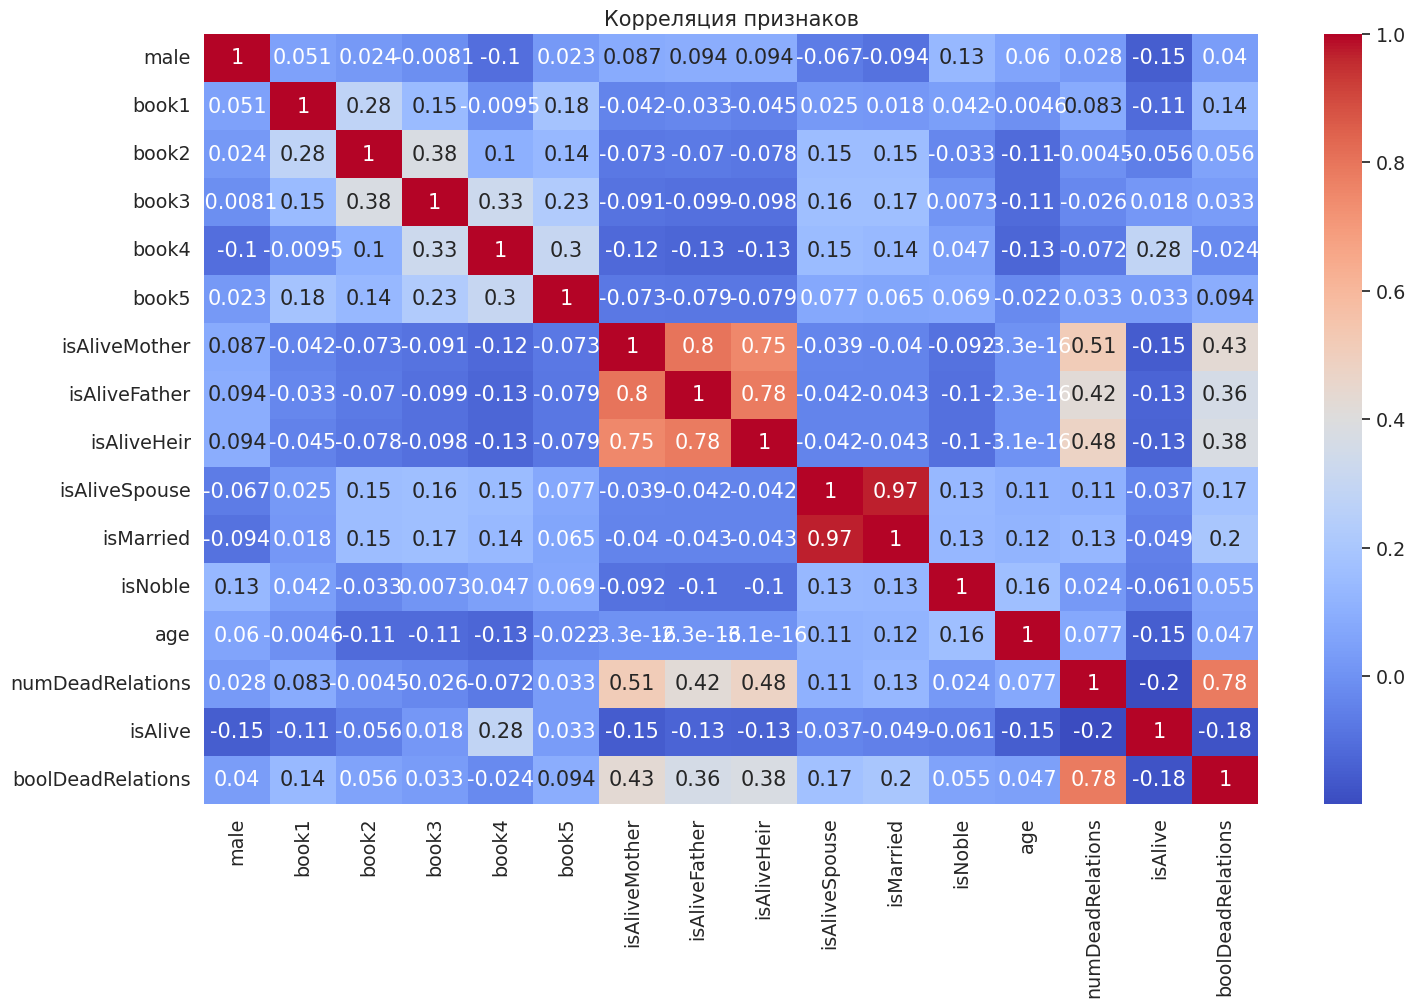

In [183]:
correlation_matrix = data_train[['male', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'isAlive', 'boolDeadRelations']].corr()
f, ax = plt.subplots(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

In [184]:
# isAlive_Someone correlates between each other much. On the ither hand we already have feature numDeadRelations combining them, therefore
data_train = data_train.drop(["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "numDeadRelations"], axis=1)

In [185]:
data_train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 1557 non-null   object 
 1   male                  1557 non-null   int64  
 2   culture               1557 non-null   object 
 3   house                 1557 non-null   object 
 4   book1                 1557 non-null   int64  
 5   book2                 1557 non-null   int64  
 6   book3                 1557 non-null   int64  
 7   book4                 1557 non-null   int64  
 8   book5                 1557 non-null   int64  
 9   isMarried             1557 non-null   int64  
 10  isNoble               1557 non-null   int64  
 11  age                   1557 non-null   float64
 12  isAlive               1557 non-null   int64  
 13  family_survival_rate  1557 non-null   float64
 14  isPopular             1557 non-null   int64  
 15  boolDeadRelations     1557

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [186]:
data_train['isAlive'].value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

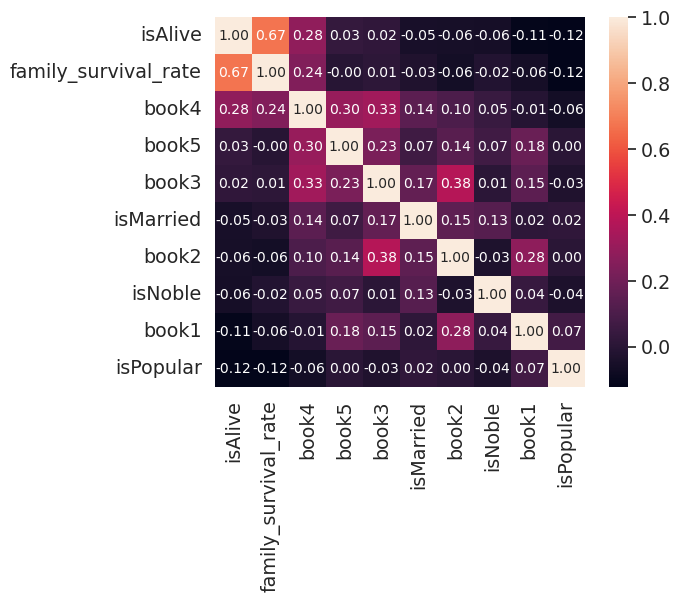

In [187]:
import numpy as np

df_numeric = data_train.select_dtypes(include=np.number)
corrmat = df_numeric.corr()
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df_numeric[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [188]:
data_test = pd.read_csv("game_of_thrones_test.csv", index_col="S.No")
data_test['family_survival_rate'] = data_test['house'].map(mortality_dict)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)
data_test["age"].fillna(data_test["age"][data_test["age"].notna()].mean(), inplace=True)
data_test["dateOfBirth"].fillna(-1, inplace=True)
data_test['family_survival_rate'] = data_test['family_survival_rate'].fillna(-1)
data_test.drop(["mother", "father", "heir", "spouse"], axis=1, inplace=True)
data_test.drop(columns=["name"], inplace = True)
data_test.drop(["isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse",'popularity','numDeadRelations','dateOfBirth'], axis=1,  inplace=True)
data_test['title'].fillna('Unknown', inplace=True)
data_test['culture'].fillna('Unknown', inplace=True)
data_test.isna().sum(axis=0)

clear_output(wait=False)

In [189]:
from sklearn.preprocessing import LabelEncoder

train_df = data_train.copy()
test_df = data_test.copy()
# Combine the two dataframes
combined_df = pd.concat([train_df, test_df], axis=0)

# Encode categorical features using LabelEncoder()
le = LabelEncoder()

categorical_cols = combined_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
   combined_df[col] = le.fit_transform(combined_df[col])

# Split the encoded data back into train and test
train_encoded = combined_df.iloc[:len(train_df), :]
test_encoded = combined_df.iloc[len(train_df):, :]
test_encoded.drop(columns=["isAlive"], inplace = True)

/tmp/ipykernel_8277/3518704156.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_encoded.drop(columns=["isAlive"], inplace = True)


In [190]:
train_encoded

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,family_survival_rate,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,244,1,47,554,0,0,0,0,0,0,0,35.290323,0.0,0.222222,1.0,1
2,151,1,39,222,1,1,1,1,1,1,1,97.000000,1.0,0.890110,1.0,1
3,217,1,47,548,0,0,0,1,0,0,1,35.290323,1.0,1.000000,0.0,0
4,194,0,47,53,0,0,0,0,0,1,1,23.000000,0.0,0.636364,0.0,0
5,68,0,60,510,0,0,0,1,0,1,1,29.000000,1.0,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,3,1,47,379,1,0,1,1,0,0,1,35.290323,1.0,1.000000,0.0,0
1554,244,0,47,283,1,1,0,0,0,0,0,35.290323,0.0,0.333333,0.0,0
1555,244,1,47,514,0,1,1,1,1,0,0,35.290323,0.0,0.428571,0.0,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

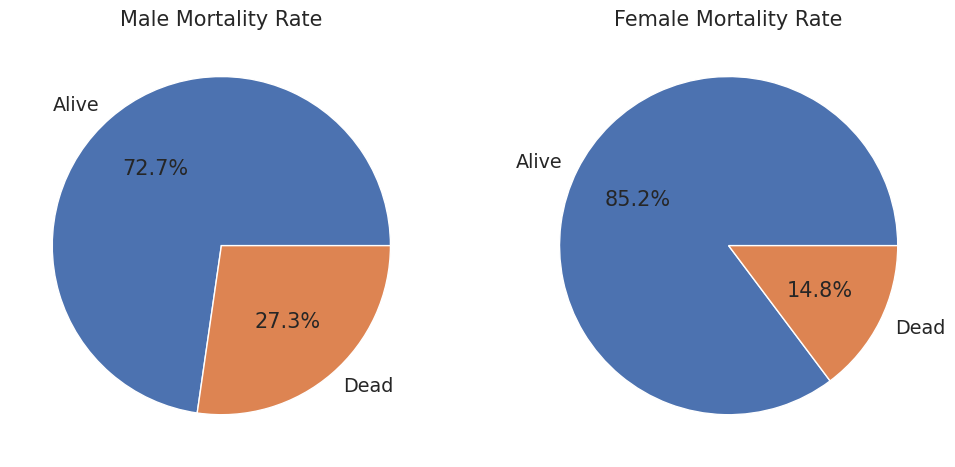

In [191]:
male_mortality = data_train[data_train['male'] == 1]['isAlive'].value_counts()
female_mortality = data_train[data_train['male'] == 0]['isAlive'].value_counts()

# Create two pie charts to visualize the distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(male_mortality, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[0].set_title('Male Mortality Rate')

ax[1].pie(female_mortality, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[1].set_title('Female Mortality Rate')

plt.show()

Как видно из графиков выше, мужчины в игре престолов гибнут чаще почти в 2 раза)

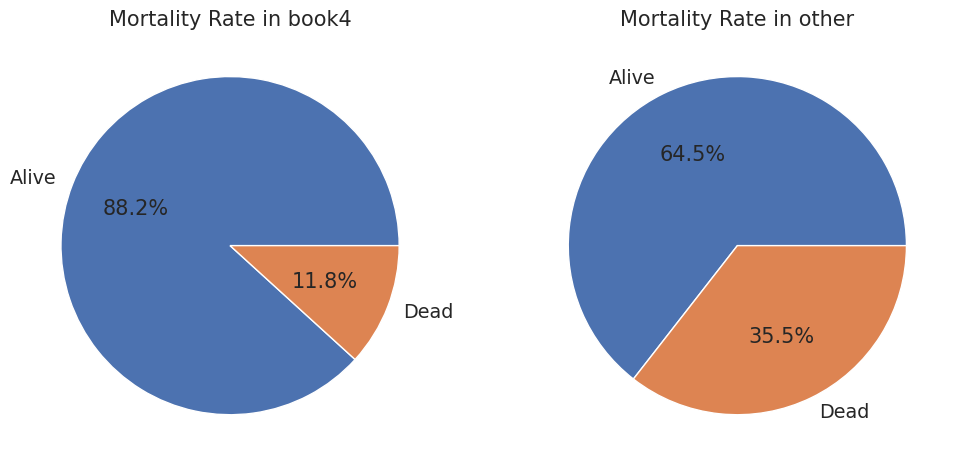

In [192]:
book4_data = data_train[data_train['book4'] == 1]['isAlive'].value_counts()
book4_not_data = data_train[data_train['book4'] == 0]['isAlive'].value_counts()

# Create two pie charts to visualize the distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(book4_data, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[0].set_title('Mortality Rate in book4')

ax[1].pie(book4_not_data, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[1].set_title('Mortality Rate in other')

plt.show()

А из этих графиков видно что 4 книга самая кровожадная

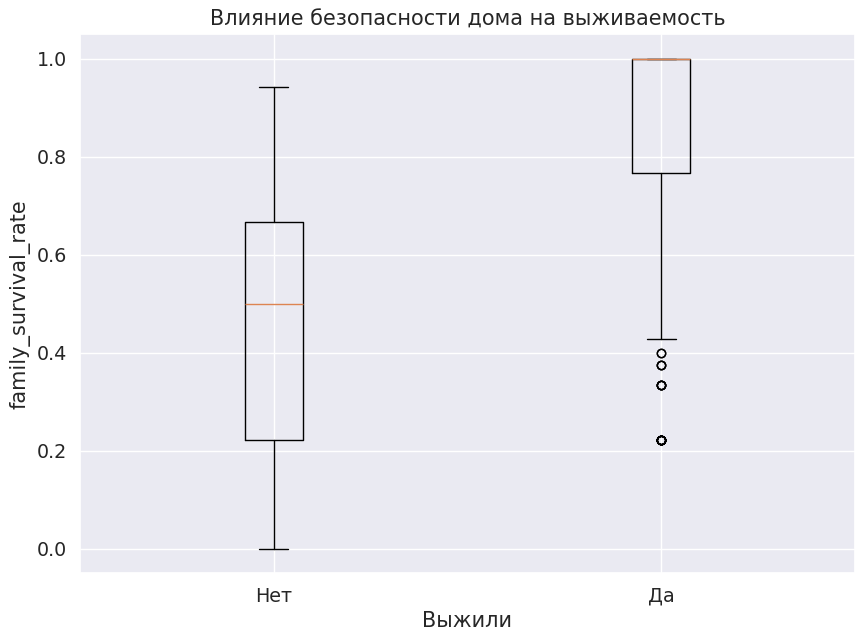

In [193]:
data1 = data_train['family_survival_rate'][data_train['isAlive'] == 0]
data2 = data_train['family_survival_rate'][data_train['isAlive'] == 1]

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Влияние безопасности дома на выживаемость')
plt.xlabel('Выжили')
plt.ylabel('family_survival_rate')
plt.xticks([1, 2], ['Нет', 'Да'])

plt.show()

Тут судить чуть сложнее, но видно, что наш созданный признак неплохо работает

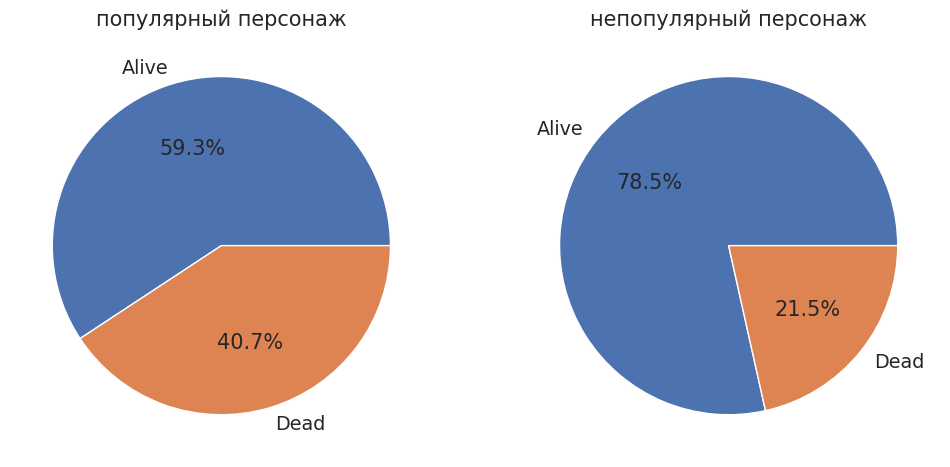

In [194]:
isPopular = data_train[data_train['isPopular'] == 1]['isAlive'].value_counts()
notPopular = data_train[data_train['isPopular'] == 0]['isAlive'].value_counts()

# Create two pie charts to visualize the distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(isPopular, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[0].set_title('популярный персонаж')

ax[1].pie(notPopular, labels=['Alive', 'Dead'], autopct='%1.1f%%')
ax[1].set_title('непопулярный персонаж')

plt.show()

In [196]:
Неутешительные новости - популярность не делает тебя Мери Сью в мире Мартина

SyntaxError: invalid syntax (2276318704.py, line 1)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [197]:
X = train_encoded.drop('isAlive', axis=1)
y = train_encoded['isAlive']

In [198]:
from imblearn.over_sampling import RandomOverSampler
# СCreate RandomOverSampler
ros = RandomOverSampler()
# Applying a larger sample to the data
X_resampled, y_resampled = ros.fit_resample(X, y)
test_encoded

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,family_survival_rate,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1558,244,0,47,83,0,0,0,0,1,0,0,100.000000,0.000000,NaN,0
1559,244,0,1,661,0,1,1,1,1,0,0,-3701.032468,1.000000,NaN,0
1560,244,0,47,8,0,0,1,1,0,0,0,-3701.032468,0.750000,NaN,0
1561,217,1,47,576,1,1,1,1,1,0,1,-3701.032468,-1.000000,NaN,0
1562,244,1,38,222,1,1,1,1,1,1,0,38.000000,0.890110,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,244,1,55,534,1,1,1,1,1,0,0,-3701.032468,0.766667,NaN,0
1943,244,1,47,90,0,1,0,1,1,0,0,-3701.032468,0.833333,NaN,0
1944,244,1,47,677,1,1,1,1,1,0,0,-3701.032468,-1.000000,NaN,0


In [199]:
X_resampled

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,family_survival_rate,isPopular,boolDeadRelations
0,244,1,47,554,0,0,0,0,0,0,0,35.290323,0.222222,1.0,1
1,151,1,39,222,1,1,1,1,1,1,1,97.000000,0.890110,1.0,1
2,217,1,47,548,0,0,0,1,0,0,1,35.290323,1.000000,0.0,0
3,194,0,47,53,0,0,0,0,0,1,1,23.000000,0.636364,0.0,0
4,68,0,60,510,0,0,0,1,0,1,1,29.000000,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,244,1,18,255,0,1,0,0,0,0,0,35.290323,0.612903,0.0,0
2420,244,1,47,193,0,1,1,0,1,1,0,35.290323,0.833333,0.0,0
2421,244,0,47,96,0,1,0,0,0,0,0,35.290323,0.666667,0.0,0
2422,217,1,47,58,0,0,0,0,0,0,1,35.290323,0.000000,0.0,0


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled.values, y_resampled.values, shuffle=True, test_size=0.2, random_state=44, stratify=y_resampled)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [201]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [202]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process  import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [203]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [204]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [205]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_valid)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8227


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [206]:
from sklearn.model_selection import RandomizedSearchCV
def find_optimal_model_params(model, X, y, param_grid, n_iter=50, cv=5, scoring='accuracy'):

    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                               n_iter=n_iter, cv=cv, scoring=scoring, n_jobs=-1, verbose=3)
    grid_search.fit(X, y)

    # Return the model with the best parameters and the best parameters themselves
    return grid_search.best_estimator_

In [207]:
models = {
      'LogisticRegression': LogisticRegression(),
      'AdaBoost': AdaBoostClassifier(),
      'RandomForest': RandomForestClassifier(),
      'GaussianProcess': GaussianProcessClassifier(),
      'GaussianNB': GaussianNB(),
      'KNeighbors': KNeighborsClassifier(),
      'DecisionTree': DecisionTreeClassifier()
}

In [208]:
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_gaussian_process = {
    'max_iter_predict': [100, 200, 300],
    'n_restarts_optimizer': [0, 1, 5],
    'warm_start': [True, False]
}

param_grid_gaussian_nb = {
    # GaussianNB doesn't have many parameters to tune.
    # You can add priors if necessary, but the model is simple by default.
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_logistic_regression = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'newton-cg', 'sag'],  # Optimization algorithm
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],  # Only used if penalty is 'elasticnet'
}

In [163]:
params = {
      'LogisticRegression': param_grid_logistic_regression,
      'AdaBoost': param_grid_adaboost,
      'RandomForest': param_grid_random_forest,
      'GaussianProcess': param_grid_gaussian_process,
      'GaussianNB': param_grid_gaussian_nb,
      'KNeighbors': param_grid_knn,
      'DecisionTree': param_grid_decision_tree
}

In [209]:
best_model = None
best_accuracy = -1
best_model_name = None
for model_name in models.keys():
  print("current model is: ", model_name)
  candidate_model = find_optimal_model_params(models[model_name],
                            X_train,
                            y_train,
                            params[model_name])

  y_pred = candidate_model.predict(X_valid)
  candidate_accuracy = accuracy_score(y_valid, y_pred)

  y_pred = candidate_model.predict(test_encoded)
  new_submission = data_test.copy()
  new_submission["isAlive"] = y_pred
  new_submission = new_submission["isAlive"]
  new_submission.to_csv(r"/home/livonian_horde/DLS_Course/HW1/content\new_submission_{}_{}.csv".format(model_name, candidate_accuracy), index=False)

  if candidate_accuracy > best_accuracy:
    best_accuracy = candidate_accuracy
    best_model = candidate_model
    best_model_name = model_name
print('##############')
print(best_accuracy, best_model_name)

current model is:  LogisticRegression
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END C=1, l1_ratio=0.9, max_iter=100, penalty=none, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=1, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, l1_ratio=0.9, max_iter=100, penalty=none, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1, l1_ratio=0.9, max_iter=100, penalty=none, solver=saga;, score=nan total time=   0.0s[CV 4/5] END C=1, l1_r

/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV 5/5] END C=1, l1_ratio=0.9, max_iter=100, penalty=none, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, l1_ratio=0.7, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, l1_ratio=0.7, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, l1_ratio=0.7, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5]

/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV 4/5] END C=0.01, l1_ratio=0.5, max_iter=100, penalty=none, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, l1_ratio=0.5, max_iter=100, penalty=none, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, l1_ratio=0.9, max_iter=200, penalty=l2, solver=newton-cg;, score=0.843 total time=   0.0s
[CV 2/5] END C=0.01, l1_ratio=0.1, max_iter=200, penalty=none, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, l1_ratio=0.1, max_iter=200, penalty=none, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, l1_ratio=0.1, max_iter=200, penalty=none, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, l1_ratio=0.1, max_iter=200, penalty=none, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=10, l1_ratio=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.629 total time=   0.1s
[CV 1/5] END C=10, l1_ratio=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.657 total time=   0.1s
[CV 5/5] END C=1, l1_ratio=0.9, max_iter=200, pe

/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/livonian_horde/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)